In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import spearmanr
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df = pd.read_csv("C:\\Users\\Chaitra.b.c\\Desktop\\Imarticus\\Machine Learning\\Projects\\ML project Datasets\\cirrhosis.csv")
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [3]:
for i in range(0,len(df["Age"])):
    df["Age"][i] = math.floor(df["Age"][i]/365.25)

<ipython-input-3-3574ae0c37bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"][i] = math.floor(df["Age"][i]/365.25)


In [4]:
df.Age.head()

0    58
1    56
2    70
3    54
4    38
Name: Age, dtype: int64

In [5]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [7]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,50.294258,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,10.471934,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,26.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,42.000000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,51.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,58.000000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,78.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [8]:
#Dropping ID
df.drop("ID", axis = 1, inplace = True)

In [9]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [10]:
df.isnull().sum()

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

<AxesSubplot:>

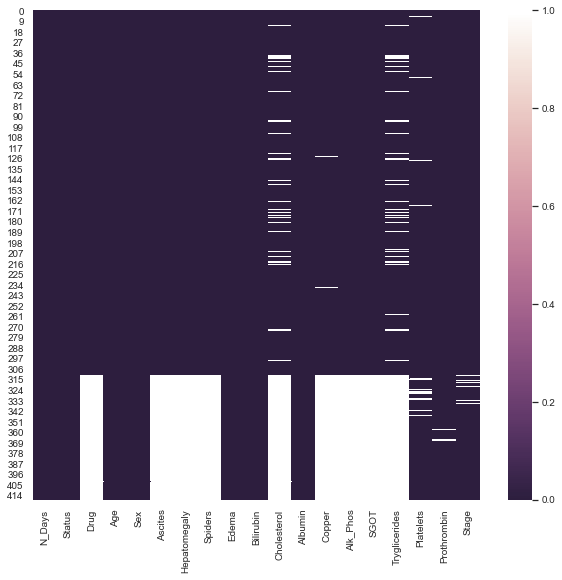

In [11]:
sns.set(rc ={"figure.figsize":(10,9)}, font_scale = 0.9)
cmap = sns.cubehelix_palette(light = 1, as_cmap = True,reverse = True)
sns.heatmap(df.isnull(), cmap = cmap)

### 1) Some of the patients didnot participate in the clinical trial (112 of such cases), but have given measurements for their survival.
### 2) Proceeding to conduct statistical tests on these variables that have less or no missing values. 

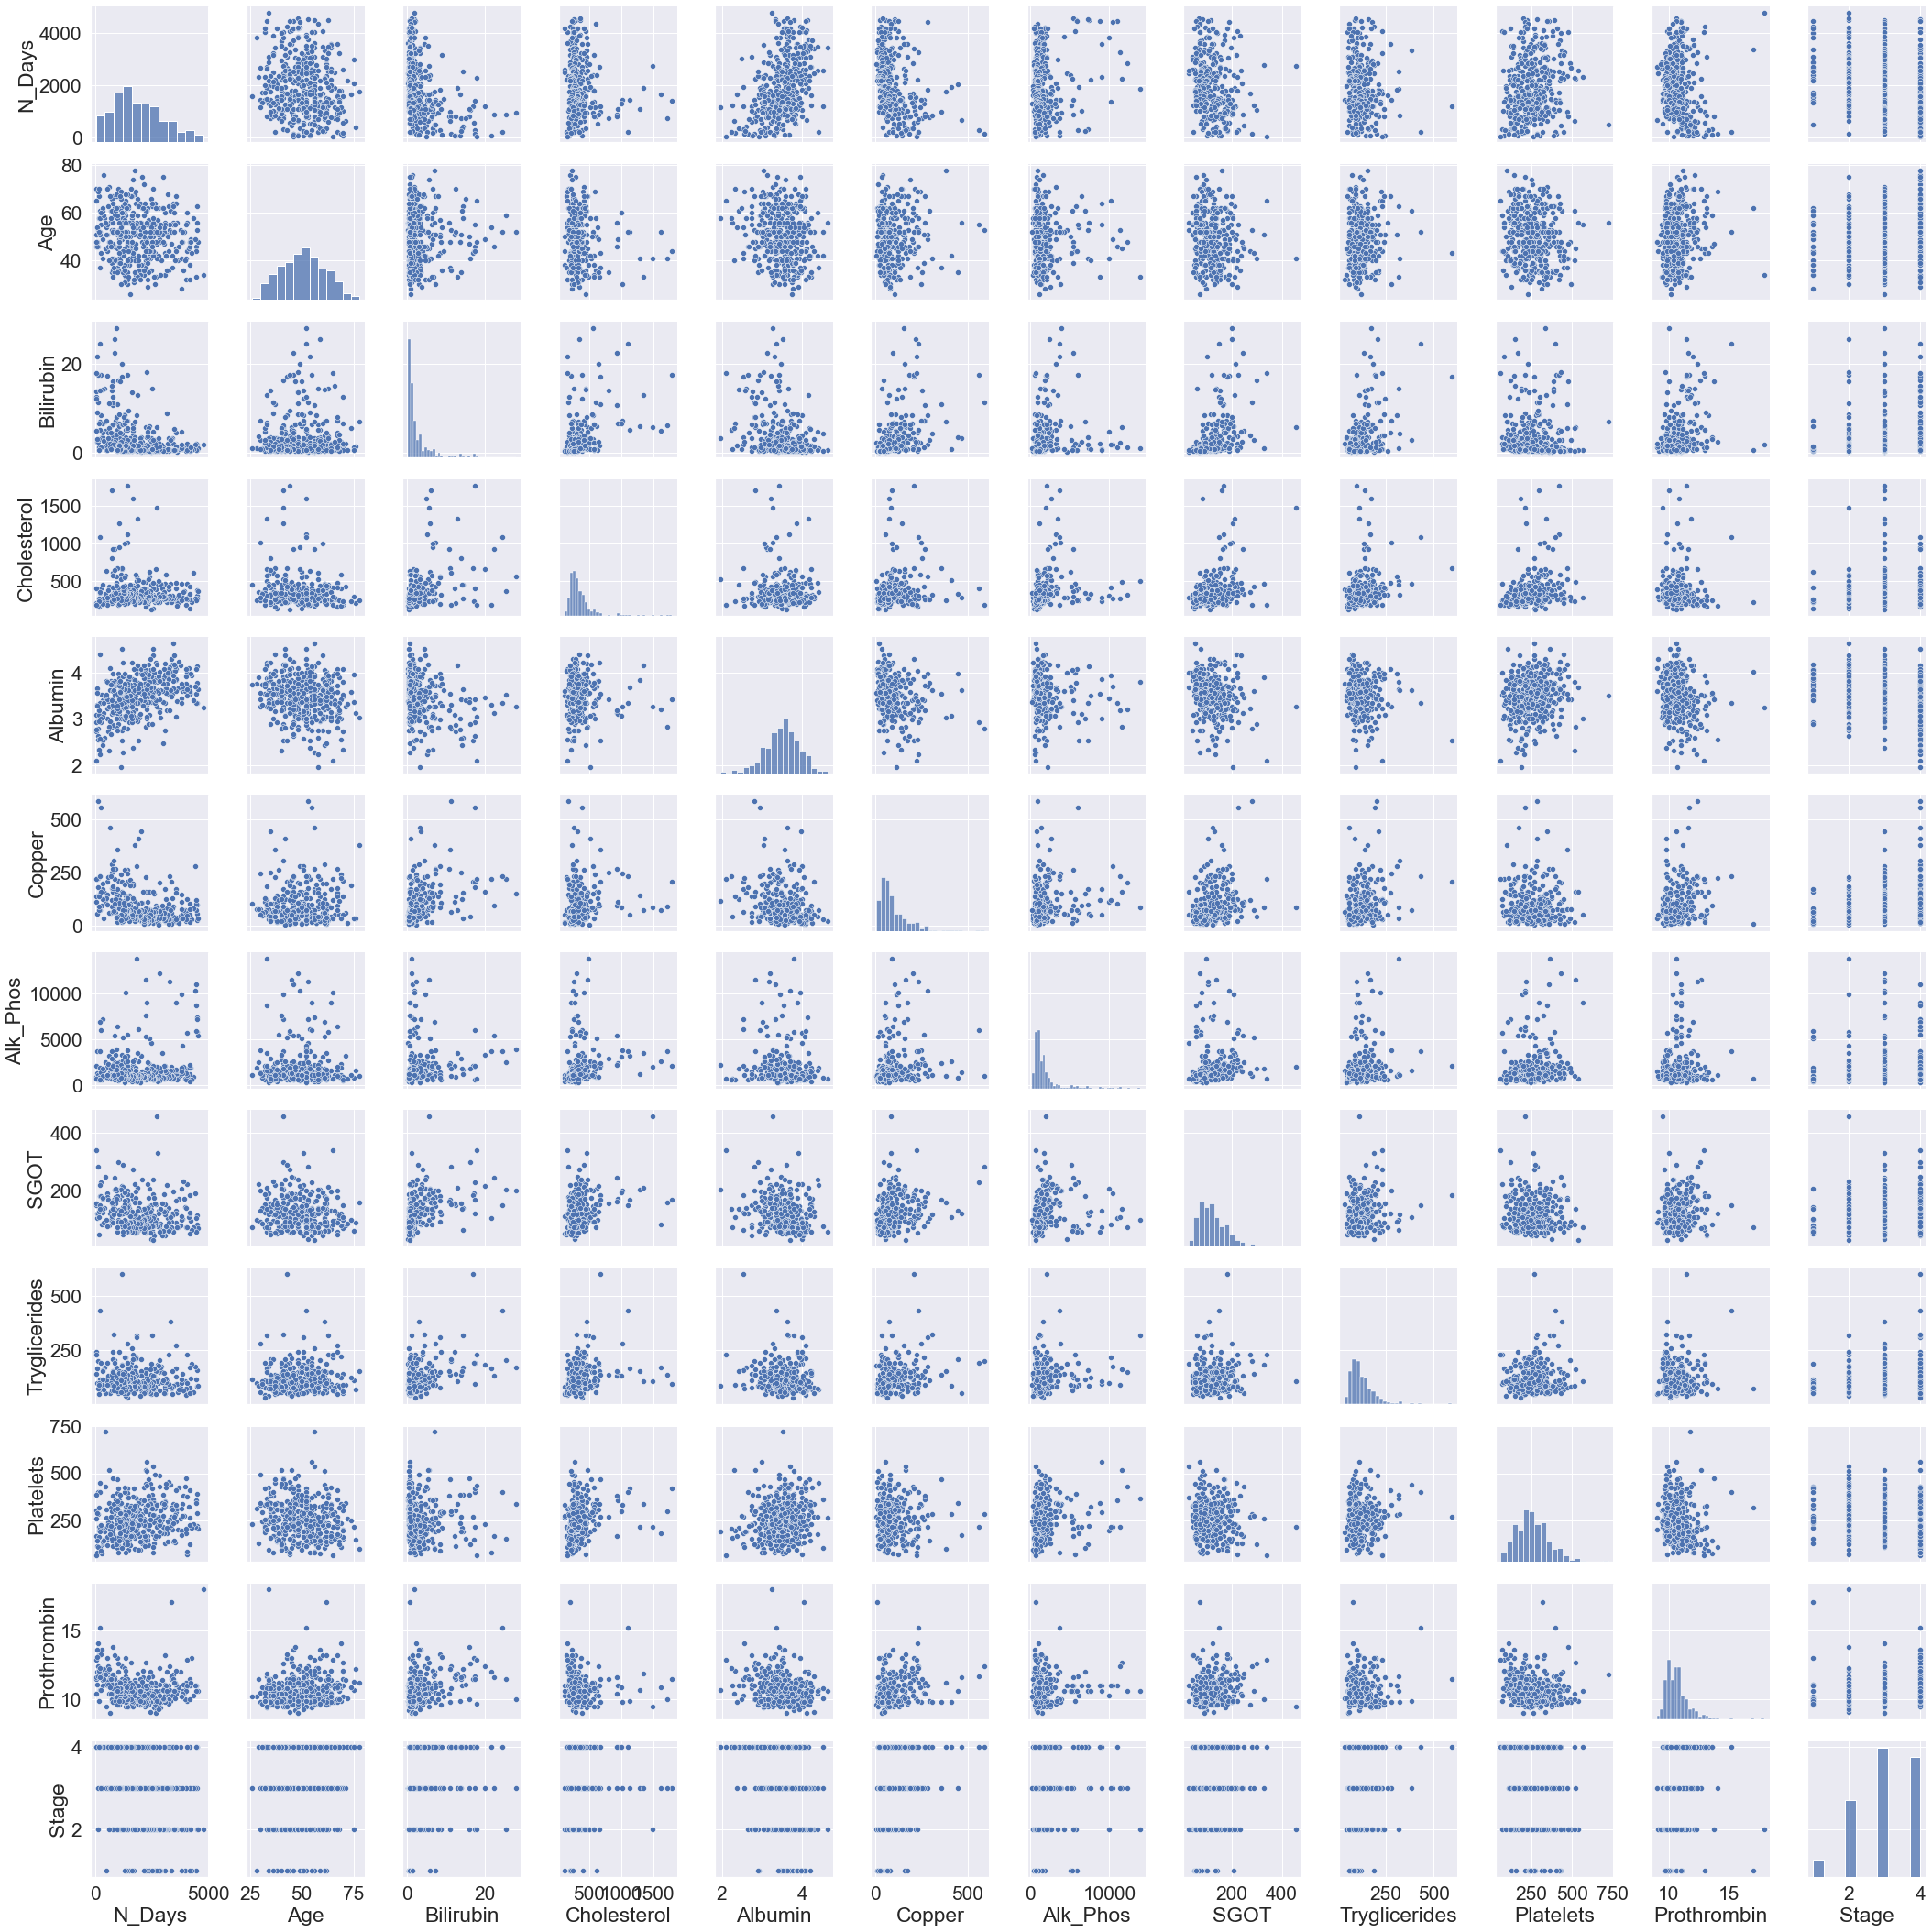

In [12]:
sns.set(rc ={"figure.figsize":(10,9)}, font_scale = 1.9)
sns.pairplot(df)

In [13]:
df.Drug.value_counts()

D-penicillamine    158
Placebo            154
Name: Drug, dtype: int64

In [14]:
df.Stage.value_counts()

3.0    155
4.0    144
2.0     92
1.0     21
Name: Stage, dtype: int64

### Cirrhosis is a complication of liver disease that involves loss of liver cells and irreversible scarring of the liver. Alcohol and viral hepatitis B and C are common causes of cirrhosis, although there are many other causes.

### Stage 1 cirrhosis involves some scarring of the liver, but few symptoms. This stage is considered compensated cirrhosis, where there are no complications.
### Stage 2 cirrhosis includes worsening portal hypertension and the development of varices.
### Stage 3 cirrhosis involves the development of swelling in the abdomen and advanced liver scarring. This stage marks decompensated cirrhosis, with serious complications and possible liver failure.
### Stage 4 cirrhosis can be life-threatening and people have developed the end-stage liver disease (ESLD), which is fatal without a transplant

### This particular dataset has high number of stage 3 and stage 4 cirrhosis patients.
### 

<AxesSubplot:>

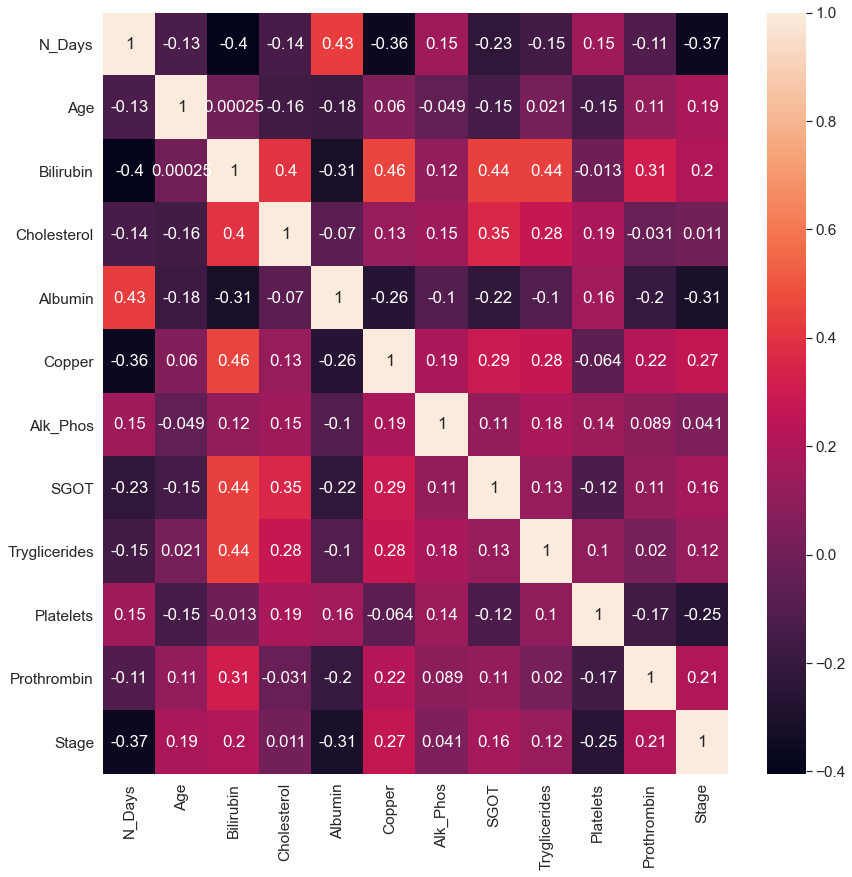

In [15]:
sns.set(rc = {'figure.figsize':(14,14)}, font_scale = 1.4)
palette = sns.color_palette('OrRd_r')
sns.heatmap(df.corr(), annot = True,)

### No much correlation among the Independent variables

In [16]:
# Separating variables to numerical and categorical
numerical_features = [i for i in df.columns if df[i].dtype != "object"]
print(numerical_features)
categorical_features = [i for i in df.columns if df[i].dtype == "object"]
print(categorical_features)

['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']


## Imputation with mode and median

In [17]:
for i in numerical_features:
    df[i].fillna(df[i].median(),inplace = True)
for i in categorical_features:
    df[i].fillna(df[i].mode()[0],inplace = True)
df.isna().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [18]:
# treating outliers with Z score.
from scipy import stats

for col in numerical_features:
    iqr = stats.iqr(df[col])
    print("\nIQR of", col, ":",iqr)
    UL = df[col].quantile(0.75) + 1.5*iqr
    LL = df[col].quantile(0.25) - 1.5*iqr
    print("No. of Outliers in",col,":", (len(df[df[col] > UL]) + len(df[df[col] < LL])) )


IQR of N_Days : 1520.75
No. of Outliers in N_Days : 0

IQR of Age : 16.0
No. of Outliers in Age : 0

IQR of Bilirubin : 2.5999999999999996
No. of Outliers in Bilirubin : 46

IQR of Cholesterol : 74.75
No. of Outliers in Cholesterol : 51

IQR of Albumin : 0.5274999999999999
No. of Outliers in Albumin : 9

IQR of Copper : 49.5
No. of Outliers in Copper : 45

IQR of Alk_Phos : 691.5
No. of Outliers in Alk_Phos : 45

IQR of SGOT : 44.75
No. of Outliers in SGOT : 26

IQR of Tryglicerides : 32.75
No. of Outliers in Tryglicerides : 47

IQR of Platelets : 125.5
No. of Outliers in Platelets : 6

IQR of Prothrombin : 1.0999999999999996
No. of Outliers in Prothrombin : 18

IQR of Stage : 2.0
No. of Outliers in Stage : 0


In [19]:
# Check for outliers.
def outliers(df, features):
    """Count the number of outliers for each feature using the IQR"""
    num_outliers = []
    pct_outliers = []
    total_rows = []
    interquartile_range = []
    for i in features:
        Q1 = df[i].quantile(.25)
        Q3 = df[i].quantile(.75)
        IQR = Q3 - Q1
        outliers = len(df[(df[i] < (Q1-1.5*IQR)) | (df[i] > (Q3+1.5*IQR))])
        rows = len(df[i])
        pct = outliers/rows
        interquartile_range.append(IQR)
        num_outliers.append(outliers)
        pct_outliers.append(pct)
        total_rows.append(rows)
        
    count_outliers = pd.DataFrame({'Feature': features
                               , 'Num_Outliers': num_outliers
                                , 'Percent_Outliers': pct_outliers
                                , 'IQR': interquartile_range
                               , 'Total_Rows': total_rows}).sort_values('Percent_Outliers', ascending=False)
    return count_outliers

count_outliers = outliers(df = df, features = numerical_features)
count_outliers

,Feature,Num_Outliers,Percent_Outliers,IQR,Total_Rows
3,Cholesterol,51,0.122010,74.7500,418
8,Tryglicerides,47,0.112440,32.7500,418
2,Bilirubin,46,0.110048,2.6000,418
5,Copper,45,0.107656,49.5000,418
6,Alk_Phos,45,0.107656,691.5000,418
7,SGOT,26,0.062201,44.7500,418
10,Prothrombin,18,0.043062,1.1000,418
4,Albumin,9,0.021531,0.5275,418
9,Platelets,6,0.014354,125.5000,418
0,N_Days,0,0.000000,1520.7500,418


In [20]:
for i in numerical_features:
    if i != "Stage":
        print("-"*90)
        print(i)
        IQR = df[i].quantile(0.75) - df[i].quantile(0.25)
        UL = df[i].quantile(0.75) + 1.5*IQR
        LL = df[i].quantile(0.25) - 1.5*IQR
        print("IQR:",IQR)
        print("UL: ",UL)
        print("LL:",LL)
        df[i] = np.where(df[i]>UL, UL,df[i])
        df[i] = np.where(df[i]<LL, LL, df[i])

------------------------------------------------------------------------------------------
N_Days
IQR: 1520.75
UL:  4894.625
LL: -1188.375
------------------------------------------------------------------------------------------
Age
IQR: 16.0
UL:  82.0
LL: 18.0
------------------------------------------------------------------------------------------
Bilirubin
IQR: 2.5999999999999996
UL:  7.299999999999999
LL: -3.0999999999999996
------------------------------------------------------------------------------------------
Cholesterol
IQR: 74.75
UL:  459.875
LL: 160.875
------------------------------------------------------------------------------------------
Albumin
IQR: 0.5274999999999999
UL:  4.561249999999999
LL: 2.4512500000000004
------------------------------------------------------------------------------------------
Copper
IQR: 49.5
UL:  175.0
LL: -23.0
------------------------------------------------------------------------------------------
Alk_Phos
IQR: 691.5
UL:  2745.0
LL: -

<AxesSubplot:>

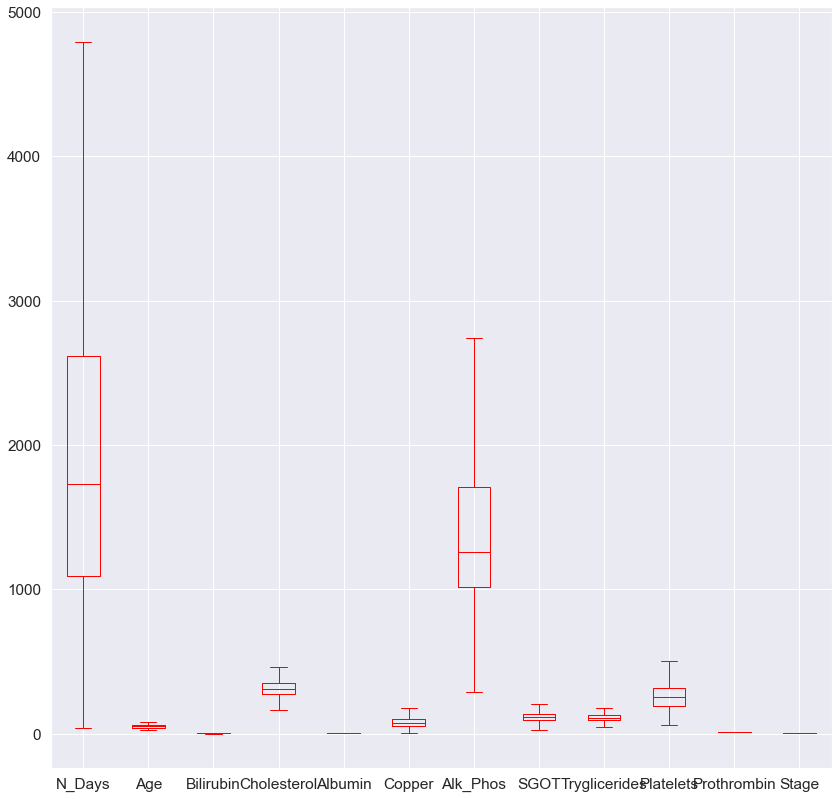

In [21]:
# Outliers visualization
df.boxplot(color = "red")

In [22]:
from scipy import stats

for col in numerical_features:
    iqr = stats.iqr(df[col])
    print("\nIQR of", col, ":",iqr)
    UL = df[col].quantile(0.75) + 1.5*iqr
    LL = df[col].quantile(0.25) - 1.5*iqr
    print("No. of Outliers in",col,":", (len(df[df[col] > UL]) + len(df[df[col] < LL])) )


IQR of N_Days : 1520.75
No. of Outliers in N_Days : 0

IQR of Age : 16.0
No. of Outliers in Age : 0

IQR of Bilirubin : 2.5999999999999996
No. of Outliers in Bilirubin : 0

IQR of Cholesterol : 74.75
No. of Outliers in Cholesterol : 0

IQR of Albumin : 0.5274999999999999
No. of Outliers in Albumin : 0

IQR of Copper : 49.5
No. of Outliers in Copper : 0

IQR of Alk_Phos : 691.5
No. of Outliers in Alk_Phos : 0

IQR of SGOT : 44.75
No. of Outliers in SGOT : 0

IQR of Tryglicerides : 32.75
No. of Outliers in Tryglicerides : 0

IQR of Platelets : 125.5
No. of Outliers in Platelets : 0

IQR of Prothrombin : 1.0999999999999996
No. of Outliers in Prothrombin : 0

IQR of Stage : 2.0
No. of Outliers in Stage : 0


## Platelets

(array([16., 45., 49., 76., 85., 57., 40., 19., 19., 12.]),
 array([ 62.   , 106.175, 150.35 , 194.525, 238.7  , 282.875, 327.05 ,
        371.225, 415.4  , 459.575, 503.75 ]),
 <BarContainer object of 10 artists>)

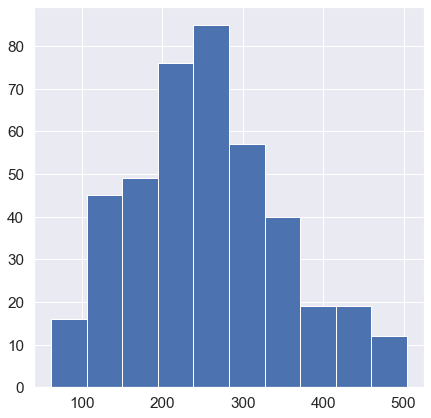

In [23]:
plt.figure(figsize = (7,7))
plt.hist(df.Platelets)

In [24]:
df.Platelets.isnull().sum()

0

In [25]:
# repalcing wih mean
df.Platelets.fillna(df.Platelets.median(), inplace = True)
df.Platelets.isnull().sum()

0

(array([16., 45., 49., 76., 85., 57., 40., 19., 19., 12.]),
 array([ 62.   , 106.175, 150.35 , 194.525, 238.7  , 282.875, 327.05 ,
        371.225, 415.4  , 459.575, 503.75 ]),
 <BarContainer object of 10 artists>)

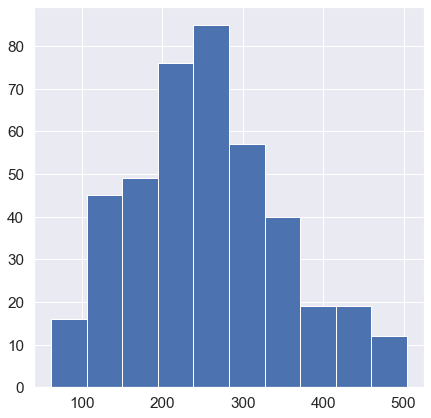

In [26]:
plt.figure(figsize = (7,7))
plt.hist(df.Platelets)

<AxesSubplot:>

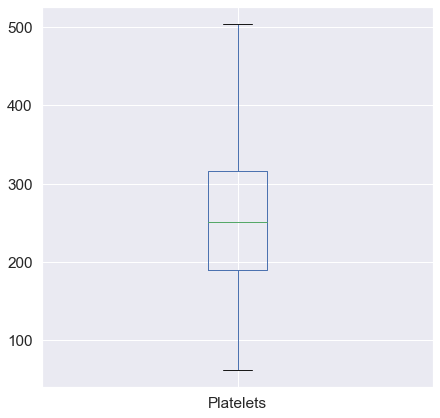

In [27]:
plt.figure(figsize = (7,7))
df.Platelets.plot(kind = "box")

## Prothrombin

<AxesSubplot:>

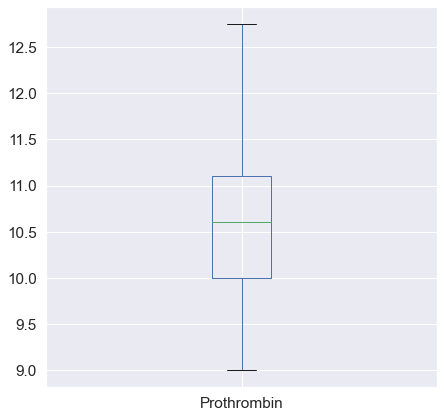

In [28]:
plt.figure(figsize = (7,7))
df.Prothrombin.plot(kind = "box")

In [29]:
# Missing values treatment
df.Prothrombin.fillna(df.Prothrombin.median(),inplace = True)
df.Prothrombin.isnull().sum()

0

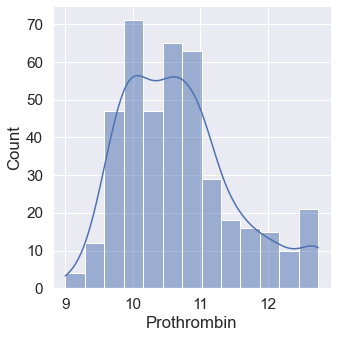

In [30]:
sns.displot(df.Prothrombin, kde = True)

In [109]:
plt.figure(figsize=(20.6,15),Fontscale = 1.3)
for i in range(1,12):
    plt.subplot(4,3,i)
    sns.kdeplot(df[numerical_features[i]], hue=df['Stage'], fill=True, palette='Purples')
    sns.despine(top=True, right=True, bottom=True, left=True)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
    plt.xlabel('')
    plt.title('{0} Distribution in stages'.format(numerical_features[i]));

TypeError: __init__() got an unexpected keyword argument 'Fontscale'

## Cholesterol

In [32]:
(df.Cholesterol.isnull().sum()/df.Cholesterol.shape[0])*100

0.0

## Stage - dependent variable

In [33]:
df.Stage.isnull().sum()

0

### These were the records where patients details were not gained after diagnosis

In [34]:
# repalcing the missing values in Stage with Stage 2 cirrhosis.
df.Stage.fillna(2,inplace = True)
df.Stage.isnull().sum()


0

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    float64
 1   Status         418 non-null    object 
 2   Drug           418 non-null    object 
 3   Age            418 non-null    float64
 4   Sex            418 non-null    object 
 5   Ascites        418 non-null    object 
 6   Hepatomegaly   418 non-null    object 
 7   Spiders        418 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    418 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         418 non-null    float64
 13  Alk_Phos       418 non-null    float64
 14  SGOT           418 non-null    float64
 15  Tryglicerides  418 non-null    float64
 16  Platelets      418 non-null    float64
 17  Prothrombin    418 non-null    float64
 18  Stage     

### Spearman's Correlation between Ordinal Dependent varaible and continuous independent variables

In [36]:
l_1 = ["Age","N_Days","Albumin","Platelets","Bilirubin","Prothrombin"]
for i in l_1:
    coeff,pvalue = spearmanr(df[i],df["Stage"])
    print("Co-eff: {0}, p-value: {1} for {2} and {3}".format(coeff,pvalue,i,"Stage"))

Co-eff: 0.18405046909728626, p-value: 0.00015431106720438246 for Age and Stage
Co-eff: -0.3795748433295019, p-value: 8.980020847267806e-16 for N_Days and Stage
Co-eff: -0.3138173690061843, p-value: 5.262058389944459e-11 for Albumin and Stage
Co-eff: -0.2524667101570756, p-value: 1.683969988020484e-07 for Platelets and Stage
Co-eff: 0.33190815941897545, p-value: 3.3087555076797338e-12 for Bilirubin and Stage
Co-eff: 0.3052528362113653, p-value: 1.8295576432397466e-10 for Prothrombin and Stage


## ANOVA for the following list of variables

In [37]:
l_1 = ["Age","N_Days","Albumin","Platelets","Bilirubin","Prothrombin"]
for i in l_1:
    print('-'*90)
    print("{0} vs {1}".format(i,"Stage"))
    mod = ols("Stage ~ {0}".format(i),data = df).fit()
    print(sm.stats.anova_lm(mod),"\n")
    print('-'*90)

------------------------------------------------------------------------------------------
Age vs Stage
             df      sum_sq    mean_sq          F    PR(>F)
Age         1.0   10.932500  10.932500  14.726373  0.000144
Residual  416.0  308.828265   0.742376        NaN       NaN 

------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
N_Days vs Stage
             df      sum_sq    mean_sq         F        PR(>F)
N_Days      1.0   41.905752  41.905752  62.74061  2.174347e-14
Residual  416.0  277.855013   0.667921       NaN           NaN 

------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
Albumin vs Stage
             df      sum_sq    mean_sq          F        PR(>F)
Albumin     1.0   28.811977  28.811977  41.195506  3.758715e-1

In [38]:
l_1 = ["Age","N_Days","Albumin","Platelets","Bilirubin","Prothrombin"]
for i in l_1:
    tukey = pairwise_tukeyhsd(df[i],df["Stage"])
    print("{0} vs {1}".format(i,"Stage"))
    print(tukey)

Age vs Stage
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   1.0    2.0    2.721 0.6706 -3.6861 9.1281  False
   1.0    3.0   2.5362 0.6881 -3.6104 8.6829  False
   1.0    4.0   6.9236 0.0213  0.7353 13.112   True
   2.0    3.0  -0.1848    0.9 -3.6472 3.2776  False
   2.0    4.0   4.2026 0.0123  0.6667 7.7385   True
   3.0    4.0   4.3874 0.0013  1.3487  7.426   True
---------------------------------------------------
N_Days vs Stage
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
   1.0    2.0  -264.9726 0.6892  -908.3396  378.3945  False
   1.0    3.0  -657.9089 0.0315 -1275.1236  -40.6942   True
   1.0    4.0 -1234.5595  0.001 -1855.9638 -613.1552   True
   2.0    3.0  -392.9363 0.0195  -740.6138  -45.2588   True
   2.0    4.0   -969.587  0.001

In [39]:
df.isna().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

## The Stage 4 of the Liver Damage is called Cirrhosis, therefore we group all stages 1 ,2 and 3 as 0 and Stage 4 as 1 for Cirrhosis.

In [40]:
df["Stage"] = np.where(df["Stage"] == 4,1,0)
df["Stage"].value_counts()

0    274
1    144
Name: Stage, dtype: int64

In [41]:
# Balancing the values with SMOTE
from sklearn.utils import resample

In [42]:
zero_sample = df[df.Stage == 0]
one_sample = df[df.Stage == 1]
print(len(zero_sample))
print(len(one_sample))

274
144


In [43]:
upsampled = resample(one_sample,replace = True,
                    n_samples = len(zero_sample),random_state = 42)

balanced_sample = pd.concat([zero_sample,upsampled])

balanced_sample.Stage.value_counts()

0    274
1    274
Name: Stage, dtype: int64

In [44]:
bs = balanced_sample.copy()
bs.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
1,4500.0,C,D-penicillamine,56.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,2745.0,113.52,88.000,221.0,10.6,0
4,1504.0,CL,Placebo,38.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.000,136.0,10.9,0
5,2503.0,D,Placebo,66.0,F,N,Y,N,N,0.8,248.0,3.98,50.0,944.0,93.00,63.000,251.0,11.0,0
6,1832.0,C,Placebo,55.0,F,N,Y,N,N,1.0,322.0,4.09,52.0,824.0,60.45,176.875,204.0,9.7,0
7,2466.0,D,Placebo,53.0,F,N,N,N,N,0.3,280.0,4.00,52.0,2745.0,28.38,176.875,373.0,11.0,0


In [46]:
# Encoding values

bs.Status.value_counts()

C     291
D     234
CL     23
Name: Status, dtype: int64

In [47]:
#pd.get_dummies
one_hot_encoded_variables = pd.get_dummies(bs["Status"],prefix='Status')
print(one_hot_encoded_variables)
bs = pd.concat([bs,one_hot_encoded_variables], axis = 1)
bs.head()

     Status_C  Status_CL  Status_D
1           1          0         0
4           0          1         0
5           0          0         1
6           1          0         0
7           0          0         1
..        ...        ...       ...
138         1          0         0
161         0          0         1
190         0          0         1
293         1          0         0
48          0          0         1

[548 rows x 3 columns]


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status_C,Status_CL,Status_D
1,4500.0,C,D-penicillamine,56.0,F,N,Y,Y,N,1.1,...,54.0,2745.0,113.52,88.000,221.0,10.6,0,1,0,0
4,1504.0,CL,Placebo,38.0,F,N,Y,Y,N,3.4,...,143.0,671.0,113.15,72.000,136.0,10.9,0,0,1,0
5,2503.0,D,Placebo,66.0,F,N,Y,N,N,0.8,...,50.0,944.0,93.00,63.000,251.0,11.0,0,0,0,1
6,1832.0,C,Placebo,55.0,F,N,Y,N,N,1.0,...,52.0,824.0,60.45,176.875,204.0,9.7,0,1,0,0
7,2466.0,D,Placebo,53.0,F,N,N,N,N,0.3,...,52.0,2745.0,28.38,176.875,373.0,11.0,0,0,0,1


In [48]:
bs["Sex"] = bs["Sex"].replace(["F","M"],[0,1])

bs.Ascites.value_counts()

N    505
Y     43
Name: Ascites, dtype: int64

In [49]:
bs["Ascites"] = bs.Ascites.replace(["N","Y"],[0,1])

bs["Hepatomegaly"].value_counts()

Y    373
N    175
Name: Hepatomegaly, dtype: int64

In [50]:
bs["Hepatomegaly"] = bs["Hepatomegaly"].replace(["Y","N"],[1,0])

bs["Spiders"].value_counts()

N    422
Y    126
Name: Spiders, dtype: int64

In [51]:
bs["Spiders"] = bs["Spiders"].replace(["Y","N"],[1,0])
bs.Edema.value_counts()

N    452
S     58
Y     38
Name: Edema, dtype: int64

In [52]:
one_hot_encoded_variables = pd.get_dummies(bs["Edema"],prefix='Edema')
print(one_hot_encoded_variables)
bs = pd.concat([bs,one_hot_encoded_variables], axis = 1)
bs.head()

     Edema_N  Edema_S  Edema_Y
1          1        0        0
4          1        0        0
5          1        0        0
6          1        0        0
7          1        0        0
..       ...      ...      ...
138        1        0        0
161        1        0        0
190        1        0        0
293        1        0        0
48         1        0        0

[548 rows x 3 columns]


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,Tryglicerides,Platelets,Prothrombin,Stage,Status_C,Status_CL,Status_D,Edema_N,Edema_S,Edema_Y
1,4500.0,C,D-penicillamine,56.0,0,0,1,1,N,1.1,...,88.000,221.0,10.6,0,1,0,0,1,0,0
4,1504.0,CL,Placebo,38.0,0,0,1,1,N,3.4,...,72.000,136.0,10.9,0,0,1,0,1,0,0
5,2503.0,D,Placebo,66.0,0,0,1,0,N,0.8,...,63.000,251.0,11.0,0,0,0,1,1,0,0
6,1832.0,C,Placebo,55.0,0,0,1,0,N,1.0,...,176.875,204.0,9.7,0,1,0,0,1,0,0
7,2466.0,D,Placebo,53.0,0,0,0,0,N,0.3,...,176.875,373.0,11.0,0,0,0,1,1,0,0


In [53]:
bs.Drug.value_counts()
bs["Drug"] = bs["Drug"].replace(["D-penicillamine","Placebo"],[1,0])


In [54]:
bs.drop(["Status","Edema"],axis = 1,inplace = True)

In [55]:
bs.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,...,Tryglicerides,Platelets,Prothrombin,Stage,Status_C,Status_CL,Status_D,Edema_N,Edema_S,Edema_Y
1,4500.0,1,56.0,0,0,1,1,1.1,302.0,4.14,...,88.000,221.0,10.6,0,1,0,0,1,0,0
4,1504.0,0,38.0,0,0,1,1,3.4,279.0,3.53,...,72.000,136.0,10.9,0,0,1,0,1,0,0
5,2503.0,0,66.0,0,0,1,0,0.8,248.0,3.98,...,63.000,251.0,11.0,0,0,0,1,1,0,0
6,1832.0,0,55.0,0,0,1,0,1.0,322.0,4.09,...,176.875,204.0,9.7,0,1,0,0,1,0,0
7,2466.0,0,53.0,0,0,0,0,0.3,280.0,4.00,...,176.875,373.0,11.0,0,0,0,1,1,0,0


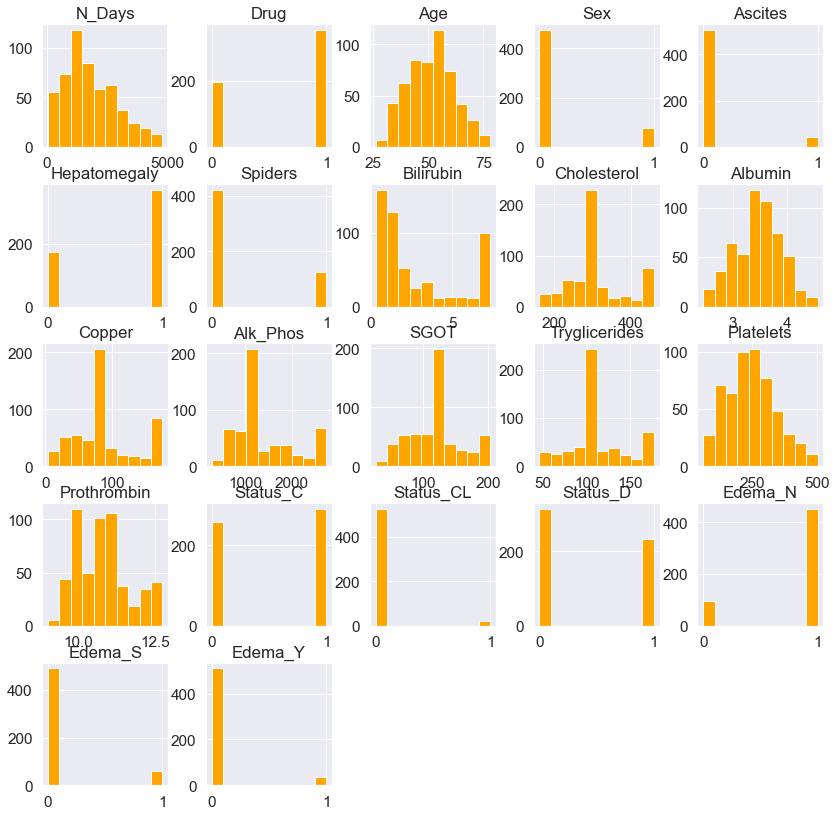

In [110]:
sns.set(rc = {'figure.figsize':(14,14)}, font_scale = 1.4)
bs.hist(color ="orange")
plt.show()

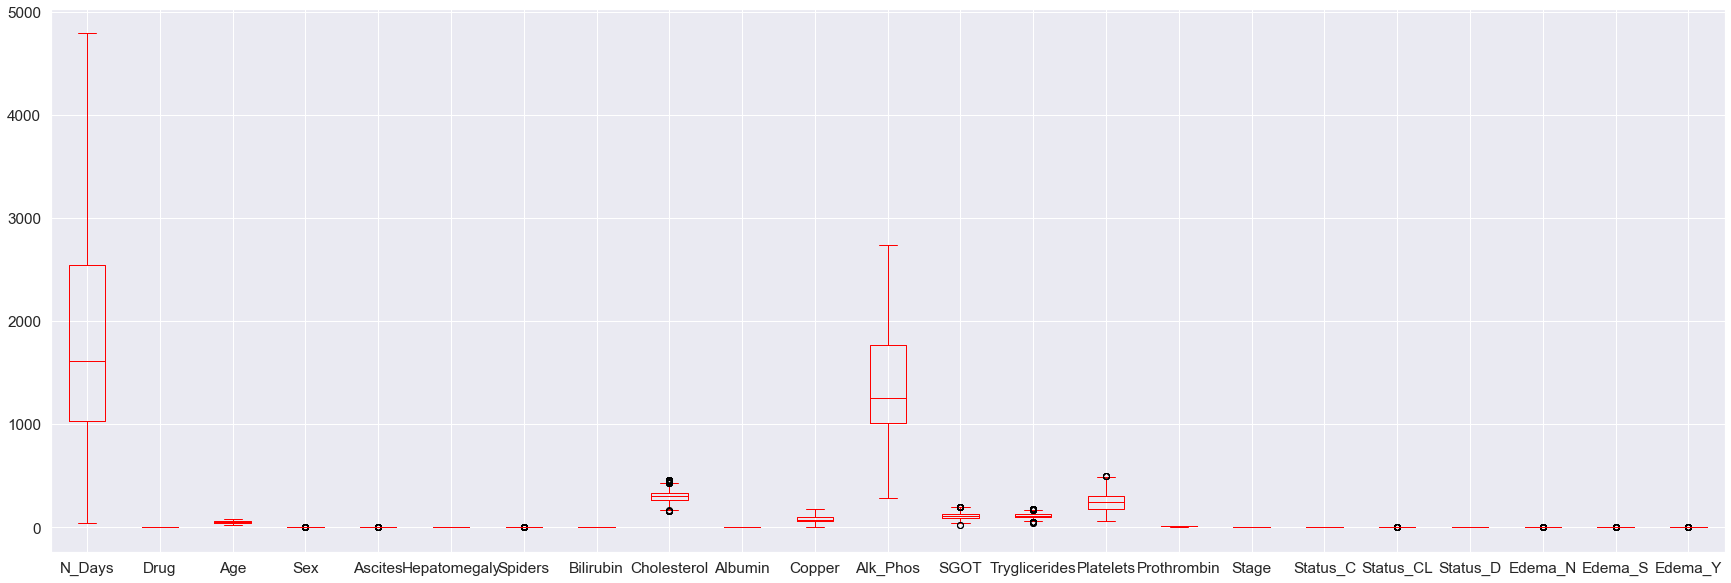

In [57]:
bs.boxplot(figsize = (30,10),color = "red")
plt.show()

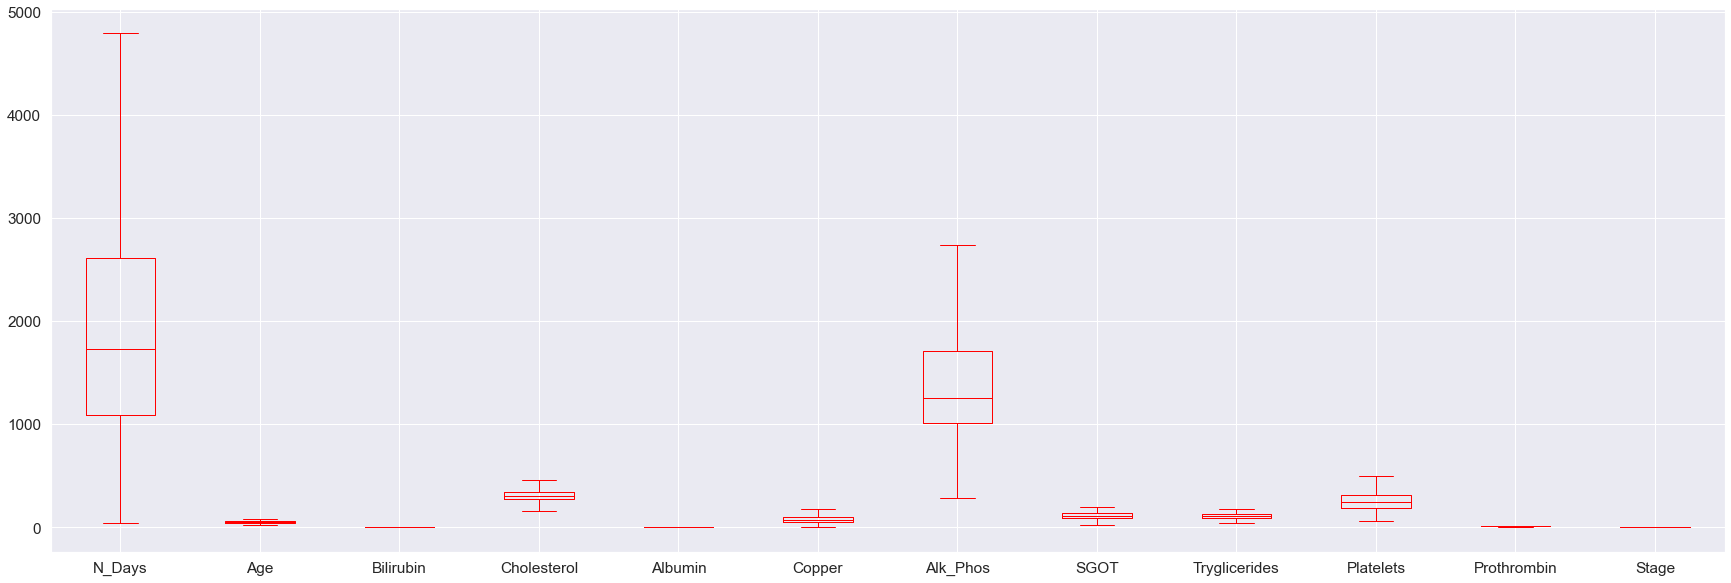

In [58]:
df.boxplot(figsize = (30,10),color = "red")
plt.show()

In [59]:
# ready for Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = bs.drop("Stage",axis = 1)
y = bs.pop("Stage")
X.head()
y.head()

1    0
4    0
5    0
6    0
7    0
Name: Stage, dtype: int32

In [60]:
X.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,...,SGOT,Tryglicerides,Platelets,Prothrombin,Status_C,Status_CL,Status_D,Edema_N,Edema_S,Edema_Y
1,4500.0,1,56.0,0,0,1,1,1.1,302.0,4.14,...,113.52,88.000,221.0,10.6,1,0,0,1,0,0
4,1504.0,0,38.0,0,0,1,1,3.4,279.0,3.53,...,113.15,72.000,136.0,10.9,0,1,0,1,0,0
5,2503.0,0,66.0,0,0,1,0,0.8,248.0,3.98,...,93.00,63.000,251.0,11.0,0,0,1,1,0,0
6,1832.0,0,55.0,0,0,1,0,1.0,322.0,4.09,...,60.45,176.875,204.0,9.7,1,0,0,1,0,0
7,2466.0,0,53.0,0,0,0,0,0.3,280.0,4.00,...,28.38,176.875,373.0,11.0,0,0,1,1,0,0


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train)

     N_Days  Drug   Age  Sex  Ascites  Hepatomegaly  Spiders  Bilirubin  \
132  2796.0     0  62.0    1        0             0        0        1.5   
235  1908.0     1  38.0    0        0             1        1        1.5   
197  2357.0     0  35.0    0        0             0        1        0.7   
10   3762.0     0  53.0    0        0             1        1        1.4   
120   191.0     0  67.0    1        1             1        0        1.3   
..      ...   ...   ...  ...      ...           ...      ...        ...   
115  3336.0     1  61.0    0        0             0        1        3.0   
167  2713.0     0  47.0    0        0             1        0        0.4   
412   989.0     1  35.0    0        0             1        0        0.7   
2    1012.0     1  70.0    1        0             0        0        1.4   
159  2772.0     0  57.0    0        0             0        0        0.6   

     Cholesterol  Albumin  ...    SGOT  Tryglicerides  Platelets  Prothrombin  \
132      331.000  

In [62]:
print(len(y_test))

165


In [63]:
#__MOdel

lr = LogisticRegression(max_iter = 1000, solver = "saga")
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
y_pred

C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1])

In [64]:
y_pred_prb = lr.predict_proba(X_test)[:,-1]
y_pred_prb

array([0.31200155, 0.44846945, 0.53646882, 0.5488613 , 0.79448284,
       0.9463392 , 0.51678511, 0.45777818, 0.53356733, 0.39164976,
       0.57270826, 0.21130428, 0.57630382, 0.59026688, 0.40087673,
       0.30963311, 0.89366034, 0.45627082, 0.78047962, 0.20565377,
       0.72793724, 0.86629135, 0.6532908 , 0.26772764, 0.07734097,
       0.48231127, 0.42732089, 0.12888929, 0.24100327, 0.59459692,
       0.52562274, 0.66397705, 0.53495656, 0.78695942, 0.29390907,
       0.24778836, 0.30684773, 0.42764507, 0.69773081, 0.42202314,
       0.37194235, 0.39100565, 0.36777915, 0.59757184, 0.40693302,
       0.77783702, 0.62991369, 0.33801704, 0.76040958, 0.57270826,
       0.8368024 , 0.30684773, 0.36313143, 0.38572672, 0.15127962,
       0.60863226, 0.16601311, 0.73852502, 0.30133592, 0.77783702,
       0.65576795, 0.78695942, 0.43039992, 0.22920479, 0.6232505 ,
       0.40298436, 0.37282147, 0.84896675, 0.23731674, 0.34960102,
       0.24391769, 0.58040733, 0.40312927, 0.58260218, 0.43791

In [65]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, accuracy_score 

In [66]:
fpr,tpr,thresholds = roc_curve(y_test, y_pred_prb)
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.02352941 0.02352941 0.04705882
 0.04705882 0.04705882 0.05882353 0.05882353 0.05882353 0.05882353
 0.07058824 0.07058824 0.08235294 0.08235294 0.15294118 0.15294118
 0.16470588 0.16470588 0.17647059 0.17647059 0.18823529 0.18823529
 0.2        0.2        0.2        0.21176471 0.21176471 0.22352941
 0.22352941 0.23529412 0.23529412 0.28235294 0.28235294 0.30588235
 0.30588235 0.30588235 0.32941176 0.32941176 0.35294118 0.35294118
 0.35294118 0.35294118 0.42352941 0.42352941 0.48235294 0.48235294
 0.48235294 0.50588235 0.50588235 0.58823529 0.58823529 0.67058824
 0.67058824 0.69411765 0.69411765 0.71764706 0.71764706 0.72941176
 0.72941176 0.84705882 0.84705882 1.        ]
[0.     0.0125 0.075  0.1    0.125  0.15   0.175  0.2    0.2125 0.2125
 0.2625 0.2625 0.2875 0.3    0.3    0.3125 0.3875 0.4    0.4    0.4125
 0.4125 0.425  0.425  0.4375 0.4375 0.4625 0.4625 0.5    0.5    0.5375
 0.5375 0.56

## Confusion_Matrix

In [67]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Stage,,
0,59,26
1,23,57


In [68]:
confusion_matrix(y_test,y_pred)

array([[59, 26],
       [23, 57]], dtype=int64)

## Performance of model based on AUC

In [69]:
auc = roc_auc_score(y_test, y_pred_prb)
auc

0.7694117647058824

Text(0.5, 1.0, 'RoC Curve')

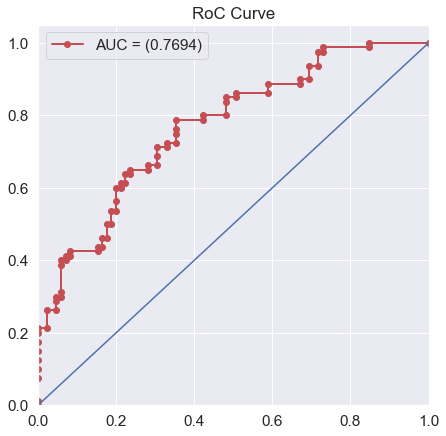

In [70]:
plt.figure(figsize = (7,7))
plt.plot(fpr,tpr, lw = 2, marker = 'o',color = "r", label = "AUC = ({0})".format(round(auc,4)))
plt.plot([0,1],marker ="_",color = "b")
plt.xlim([0.0,1])
plt.ylim([0.0,1.05])
plt.legend()
plt.title("RoC Curve")


In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.69      0.71        85
           1       0.69      0.71      0.70        80

    accuracy                           0.70       165
   macro avg       0.70      0.70      0.70       165
weighted avg       0.70      0.70      0.70       165



In [72]:
accuracy_score(y_test,y_pred)

0.703030303030303

### Accuracy can be improved

In [73]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [74]:
#_______defining the Multinomial Logistic Regression
clf = LogisticRegression(max_iter = 3000)

#____Cross validation
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 42)

#___________evaluate the model and collect the scores
n_scores = cross_val_score(clf, X, y, cv = cv,scoring = 'accuracy', n_jobs = -1, verbose = 2)

#___report model Performance
print('Mean accuracy: %.3f std: %.3f'%(np.mean(n_scores),np.std(n_scores)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Mean accuracy: 0.759 std: 0.059


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   17.0s finished


## Accuracy improved!

### Scaling to improve speed

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
X = scale(X)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [76]:
bs.columns

Index(['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
       'Tryglicerides', 'Platelets', 'Prothrombin', 'Status_C', 'Status_CL',
       'Status_D', 'Edema_N', 'Edema_S', 'Edema_Y'],
      dtype='object')

In [77]:
scaled_df = pd.DataFrame(X,columns = bs.columns)

In [78]:
scaled_df.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,...,SGOT,Tryglicerides,Platelets,Prothrombin,Status_C,Status_CL,Status_D,Edema_N,Edema_S,Edema_Y
0,2.455921,0.746203,0.471438,-0.398199,-0.291802,0.684959,1.830084,-0.684126,-0.164003,1.591398,...,-0.097500,-0.800965,-0.288023,-0.215944,0.939767,-0.209307,-0.863263,0.460857,-0.344046,-0.272965
1,-0.280443,-1.340119,-1.235707,-0.398199,-0.291802,0.684959,1.830084,0.248968,-0.470098,0.156301,...,-0.106792,-1.303126,-1.200638,0.124922,-1.064094,4.777665,-0.863263,0.460857,-0.344046,-0.272965
2,0.631982,-1.340119,1.419851,-0.398199,-0.291802,0.684959,-0.546423,-0.805834,-0.882661,1.214979,...,-0.612874,-1.585592,0.034076,0.238544,-1.064094,-0.209307,1.158396,0.460857,-0.344046,-0.272965
3,0.019132,-1.340119,0.376596,-0.398199,-0.291802,0.684959,-0.546423,-0.724695,0.102166,1.473767,...,-1.430390,1.988387,-0.470546,-1.238542,0.939767,-0.209307,-0.863263,0.460857,-0.344046,-0.272965
4,0.598189,-1.340119,0.186914,-0.398199,-0.291802,-1.459941,-0.546423,-1.008681,-0.456790,1.262032,...,-2.235850,1.988387,1.343946,0.238544,-1.064094,-0.209307,1.158396,0.460857,-0.344046,-0.272965


In [79]:
n_scores = cross_val_score(clf, scaled_df, y, cv = cv,scoring = 'accuracy', n_jobs = -1, verbose = 2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.8s finished


In [80]:
# Grid search
from sklearn.model_selection import GridSearchCV
param_grid = {"C":[100,10,1,0.1,0.01],
              "solver":["liblinear","lbfgs","newton-cg","sag","saga"],
              "penalty":['none', 'l1','l2','elasticnet']}
gsearch = GridSearchCV(estimator = clf, param_grid = param_grid, cv = cv,
                      scoring = 'accuracy',error_score = 0)
gresult = gsearch.fit(scaled_df,y)

#summarize results
print("Best: %f using %s" % (gresult.best_score_, gresult.best_params_))
means = gresult.cv_results_['mean_test_score']
stds = gresult.cv_results_['std_test_score']
params = gresult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warni

C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warni

C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warni

C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warni

C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warni

C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warni

C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warni

C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warni

C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warni

C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warni

C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warni

Best: 0.764669 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'none', 'solver': 'liblinear'}
0.758552 (0.056994) with: {'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}
0.758552 (0.056994) with: {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}
0.758552 (0.056994) with: {'C': 100, 'penalty': 'none', 'solver': 'sag'}
0.758552 (0.056994) with: {'C': 100, 'penalty': 'none', 'solver': 'saga'}
0.757946 (0.057801) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'sag'}
0.757946 (0.057801) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.758552 (0.056994) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.758552 (0.056994) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.758552 (0.056994) with: {'

C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1350 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Chaitra.b.c\AppData\Roaming\Python\Python38\site

In [81]:
#summarize results
print("Best: %f using %s" % (gresult.best_score_, gresult.best_params_))
means = gresult.cv_results_['mean_test_score']
stds = gresult.cv_results_['std_test_score']
params = gresult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.764669 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'none', 'solver': 'liblinear'}
0.758552 (0.056994) with: {'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}
0.758552 (0.056994) with: {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}
0.758552 (0.056994) with: {'C': 100, 'penalty': 'none', 'solver': 'sag'}
0.758552 (0.056994) with: {'C': 100, 'penalty': 'none', 'solver': 'saga'}
0.757946 (0.057801) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'sag'}
0.757946 (0.057801) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.758552 (0.056994) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.758552 (0.056994) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.758552 (0.056994) with: {'

In [84]:
X_train,X_test,y_train,y_test = train_test_split(scaled_df,y,test_size = 0.3, random_state = 42)

In [85]:
y_pred = gresult.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1])

In [86]:
#Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[66, 19],
       [13, 67]], dtype=int64)

In [100]:
pd.crosstab(y_test,y_pred,rownames = ["Actual"] ,colnames = ["Predicted"],
           margins = True, margins_name = "all")

Predicted,0,1,all
Actual,,,
0,66,19,85
1,13,67,80
all,79,86,165


In [87]:
#Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.80        85
           1       0.78      0.84      0.81        80

    accuracy                           0.81       165
   macro avg       0.81      0.81      0.81       165
weighted avg       0.81      0.81      0.81       165



In [103]:
Specificity = 66/(66+19)
print(Specificity)

0.7764705882352941


### 1)The model has a higher precision of not tagging a person with who is actually negative and tagging positive to who is actually positive.

In [88]:
#Accuracy_score
accuracy_score(y_test,y_pred)

0.806060606060606

In [89]:
y_pred_prb = gresult.predict_proba(X_test)[:,-1]
y_pred_prb

array([0.25194765, 0.61417455, 0.54101829, 0.52090851, 0.84773515,
       0.96915268, 0.1992212 , 0.42787159, 0.42448597, 0.20545563,
       0.68023337, 0.12596129, 0.66598864, 0.34531013, 0.49063266,
       0.22123199, 0.94454278, 0.70606695, 0.71082344, 0.12064837,
       0.86533812, 0.97235316, 0.56875635, 0.17394274, 0.04732425,
       0.41609592, 0.53117043, 0.07942759, 0.22700089, 0.35045125,
       0.1898932 , 0.66491165, 0.20637583, 0.86019188, 0.53362883,
       0.05313437, 0.80836431, 0.41140417, 0.72768548, 0.41184002,
       0.3868032 , 0.53771414, 0.52297312, 0.73206298, 0.24392607,
       0.88131643, 0.6284319 , 0.38410696, 0.72253233, 0.68023337,
       0.97911824, 0.80836431, 0.29836431, 0.18767848, 0.07471934,
       0.28308395, 0.11537104, 0.90168255, 0.41206653, 0.88131643,
       0.75470281, 0.86019188, 0.20867858, 0.09881754, 0.37801033,
       0.64522164, 0.27487092, 0.72194319, 0.23173687, 0.32116964,
       0.06584619, 0.53395541, 0.43151047, 0.56031539, 0.12715

In [90]:
#__fpr, tpr, thresholds
fpr,tpr,thresholds = roc_curve(y_test, y_pred_prb)
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.         0.02352941 0.02352941 0.02352941
 0.02352941 0.02352941 0.02352941 0.02352941 0.02352941 0.03529412
 0.03529412 0.03529412 0.04705882 0.04705882 0.05882353 0.05882353
 0.05882353 0.05882353 0.05882353 0.05882353 0.05882353 0.08235294
 0.08235294 0.09411765 0.09411765 0.10588235 0.10588235 0.11764706
 0.11764706 0.12941176 0.12941176 0.12941176 0.16470588 0.16470588
 0.16470588 0.18823529 0.18823529 0.21176471 0.21176471 0.22352941
 0.22352941 0.27058824 0.27058824 0.31764706 0.31764706 0.36470588
 0.36470588 0.44705882 0.44705882 0.62352941 0.62352941 0.67058824
 0.67058824 0.70588235 0.70588235 0.75294118 0.75294118 1.        ]
[0.     0.025  0.1    0.1    0.1375 0.1625 0.1875 0.2125 0.2625 0.3
 0.325  0.325  0.35   0.3625 0.3625 0.3875 0.3875 0.4125 0.4375 0.475
 0.4875 0.525  0.55   0.55   0.5875 0.5875 0.6125 0.6125 0.6375 0.6375
 0.6625 0.6625 0.6875 0.7125 0.7125 0.75   0.7875 0.7875 0.825  0.825
 0.8375 0.8375 0.8625 0.8625 0.875  0.875  0.8875 

In [91]:
#___AUC_score
auc = roc_auc_score(y_test, y_pred_prb)
auc

0.8638235294117647

Text(0.5, 1.0, 'RoC Curve')

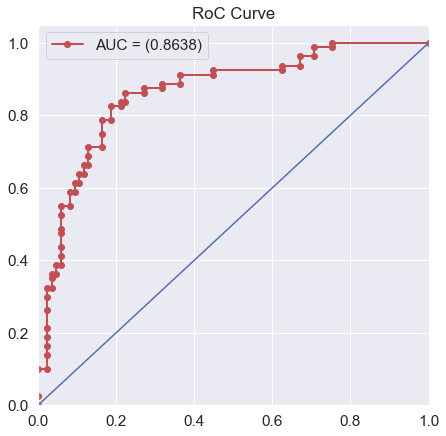

In [92]:
plt.figure(figsize = (7,7))
plt.plot(fpr,tpr, lw = 2, marker = 'o',color = "r", label = "AUC = ({0})".format(round(auc,4)))
plt.plot([0,1],marker ="_",color = "b")
plt.xlim([0.0,1])
plt.ylim([0.0,1.05])
plt.legend()
plt.title("RoC Curve")

### This is the optimum Logistic regression model obtained for this dataset with accuracy of 0.806 and AUC score of 0.8638.

### The model has high precision and high recall with relatively good Specificity which is favoured in Medical research.